# Design and Simulation of Microstrip Directional Coupler

# Model 1

Datos:

* w: longitud del strip
* t: espesor de la línea = 17.5 $\mu$m
* l: longitud del sustrato
* S: separación entre líneas
* $Z_0$=50 $\Omega$
* C=3.8 dB
* f=10 GHz

Sustrato  (FR-4)
* h: espesor del sustrato 
* $\epsilon_r$ - dielectric constant = 4.3


* Wavelength=14.46 mm

## Information

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Z0=50
C=3.8
er=4.3
h=0.3
t=0.0175
Z2=Z0/np.sqrt(2)
lamb0=14.46 #in milimeters
f=10

## Functions

In [ ]:
def fun_c(C):
  c=10**(-C/20)
  print("c value is: ",c)
  return c

In [ ]:
def fun_Z(c,Z0):
  Z_oe = Z0*np.sqrt((1+c)/(1-c))
  Z_oo = Z0*np.sqrt((1-c)/(1+c))
  Z_ose = Z_oe/2
  Z_oso = Z_oo/2
  print("Z0 value is: ", Z0)
  print("Z_oe value is: ", Z_oe)
  print("Z_oo value is: ", Z_oo)
  print("Z_ose value is: ", Z_ose)
  print("Z_oso value is: ", Z_oso)
  return Z_oe,Z_oo,Z_ose,Z_oso

In [ ]:
def fun_A(Z0,er):
  A=(Z0/60)*np.sqrt((er+1)/2) + ((er-1)/(er+1))*(0.23+0.11/er)
  print("A value is: ",A)
  return A

In [ ]:
def fun_B(er):
  B=(377*np.pi)/(2*Z0*np.sqrt(er))
  print("B value is: ",B)
  return B

In [ ]:
def fun_WA(A,h):
  WA = (8*h*np.exp(A))/(np.exp(2*A)-2)
  #WA = (8*np.exp(A))/(np.exp(2*A)-2)
  print("WA value is: ",WA)
  return WA

In [ ]:
def fun_WB(B,er,h):
  WB = (2*h/np.pi)*( B-1-np.log(B-1)+((er-1)/(2*er))*np.log(B-1)+0.39-0.61/er )
  print("WB value is: ",WB)
  return WB

In [ ]:
def fun_W(WA,WB,h):
  if WA<=2*h:
    W=WA
  elif WB>2*h:
    W=WB
  else:
    W=0
    print("w is wrong")

  print("W value is: ",W)
  return W

In [ ]:
def fun_eff(W,er,h):
  eff=(er+1)/2+((er-1)/2)*(1+12*h/W)**(-0.5)
  print("eff value is: ",eff)
  return eff

In [ ]:
def fun_legth(lamb0,eff):
  lent=lamb0/(4*np.sqrt(eff))
  print("lent value is: ",lent)

  return lent

## Impedance Calculus

### Z0=50$\Omega$

In [ ]:
c=fun_c(C)
Z_oe,Z_oo,Z_ose,Z_oso=fun_Z(c,Z0)

c value is:  0.6456542290346555
Z0 value is:  50
Z_oe value is:  107.75208250889716
Z_oo value is:  23.201407729577507
Z_ose value is:  53.87604125444858
Z_oso value is:  11.600703864788754


In [ ]:
A50=fun_A(Z0,er)

A value is:  1.5157039687915472


In [ ]:
WA50=fun_WA(A50,h)

WA value is:  0.5834705843054896


In [ ]:
B50=fun_B(er)
WB50=fun_WB(B50,er,h)

B value is:  5.711589612811198
WB value is:  0.7647995286522513


In [ ]:
W=fun_W(WA50,WB50,h)

W value is:  0.5834705843054896


In [ ]:
eff50=fun_eff(W,er,h)

eff value is:  3.2662047863729557


In [ ]:
len50=fun_legth(lamb0,eff50)

lent value is:  2.000260672002573


0.0019764714696287764

### $Z2=\frac{Z0}{\sqrt{2}}=35.35 \Omega$

In [ ]:
Z35=Z2

In [ ]:
c=fun_c(C)
Z_oe35,Z_oo35,Z_ose35,Z_oso35=fun_Z(c,Z35)

c value is:  0.6456542290346555
Z0 value is:  35.35533905932737
Z_oe value is:  76.19222822901355
Z_oo value is:  16.405872738658232
Z_ose value is:  38.096114114506776
Z_oso value is:  8.202936369329116


In [ ]:
A35=fun_A(Z35,er)

A value is:  1.118374288551683


In [ ]:
WA35=fun_WA(A35,h)

WA value is:  0.9974007914088935


In [ ]:
B35=fun_B(er)
WB35=fun_WB(B35,er,h)

B value is:  5.711589612811198
WB value is:  0.7647995286522513


In [ ]:
W35=fun_W(WA35,WB35,h)

W value is:  0.7647995286522513


In [ ]:
eff35=fun_eff(W35,er,h)

eff value is:  3.3406779624676983


In [ ]:
len35=fun_legth(lamb0,eff35)

lent value is:  1.9778392699537795


## Final values

In [ ]:
mesurament={'frecuency (GHz)':f,'wavelengt (mm)':lamb0,'sustarte h (mm)':h,
            'dielectric er':er,'impedance Z0 (Ohms)':Z0,
            'w35(mm)':W35,'L35(mm)':len35,'w50(mm)':W,'L50(mm)':len50}

In [ ]:
pd.DataFrame.from_dict(mesurament, orient='index')

,0
frecuency (GHz),10.000000
wavelengt (mm),14.460000
sustarte h (mm),0.300000
dielectric er,4.300000
impedance Z0 (Ohms),50.000000
w35(mm),0.764800
L35(mm),1.977839
w50(mm),0.583471
L50(mm),2.000261


In [ ]:
Z2

35.35533905932737

#Model 2

Datos:

* w: longitud del strip
* t: espesor de la línea = 17.5 $\mu$m
* l: longitud del sustrato
* S: separación entre líneas
* $Z_0$=50 $\Omega$
* C=3.8 dB
* f=10 GHz

Sustrato  (Rogers rt-5880)
* h: espesor del sustrato 
* $\epsilon_r$ - dielectric constant = 2.2


* Wavelength=14.46 mm

## Information

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Z0=50
C=3.8
er=2.2
h=0.33 #in milimeters
t=0.0175
Z2=Z0/np.sqrt(2)
lamb0=14.46 #in milimeters
f=10

## Functions

$c=10^{-C/20}$

In [ ]:
def fun_c(C):
  c=10**(-C/20)
  print("c value is: ",c)
  return c

$Z_{oe}=Z_0 \sqrt{\frac{1+c}{1-c}}$

$Z_{oo}=Z_0 \sqrt{\frac{1-c}{1+c}}$

$Z_{ose}=\frac{Z_{oe}}{2}$

$Z_{oso}=\frac{Z_{oo}}{2}$

In [ ]:
def fun_Z(c,Z):
  Z_oe = Z*np.sqrt((1+c)/(1-c))
  Z_oo = Z*np.sqrt((1-c)/(1+c))
  Z_ose = Z_oe/2
  Z_oso = Z_oo/2
  print("Z value is: ", Z)
  print("Z_oe value is: ", Z_oe)
  print("Z_oo value is: ", Z_oo)
  print("Z_ose value is: ", Z_ose)
  print("Z_oso value is: ", Z_oso)
  return Z_oe,Z_oo,Z_ose,Z_oso

In [ ]:
def fun_A(Z,er):
  A=(Z/60)*np.sqrt((er+1)/2) + ((er-1)/(er+1))*(0.23+0.11/er)
  print("A value is: ",A)
  return A

$B=\frac{377\pi}{2Z\sqrt{\epsilon_r}}$

In [ ]:
def fun_B(er,Z):
  B=(377*np.pi)/(2*Z*np.sqrt(er))
  print("B value is: ",B)
  return B

In [ ]:
def fun_WA(A,h):
  WA = (8*h*np.exp(A))/(np.exp(2*A)-2)
  #WA = (8*np.exp(A))/(np.exp(2*A)-2)
  print("WA value is: ",WA)
  return WA

In [ ]:
def fun_WB(B,er,h):
  WB = (2*h/np.pi)*( B-1-np.log(B-1)+((er-1)/(2*er))*np.log(B-1)+0.39-0.61/er )
  print("WB value is: ",WB)
  return WB

In [ ]:
def fun_W(WA,WB,h):
  if WA<=2*h:
    W=WA
  elif WB>2*h:
    W=WB
  else:
    W=0
    print("w is wrong")

  print("W value is: ",W)
  return W

In [ ]:
def fun_eff(W,er,h):
  eff=(er+1)/2+((er-1)/2)*(1+12*h/W)**(-0.5)
  print("eff value is: ",eff)
  return eff

In [ ]:
def fun_legth(lamb0,eff):
  lent=lamb0/(4*np.sqrt(eff))
  print("lent value is: ",lent)

  return lent

## Impedance Calculus

### Z0=50$\Omega$

In [ ]:
c=fun_c(C)
Z_oe,Z_oo,Z_ose,Z_oso=fun_Z(c,Z0)

c value is:  0.6456542290346555
Z value is:  50
Z_oe value is:  107.75208250889716
Z_oo value is:  23.201407729577507
Z_ose value is:  53.87604125444858
Z_oso value is:  11.600703864788754


In [ ]:
A50=fun_A(Z0,er)

A value is:  1.1590925533894598


In [ ]:
WA50=fun_WA(A50,h)

WA value is:  1.0314521279365008


In [ ]:
B50=fun_B(er,Z0)
WB50=fun_WB(B50,er,h)

B value is:  7.985091232820953
WB value is:  1.1941544183064052


In [ ]:
W50=fun_W(WA50,WB50,h)

W value is:  1.1941544183064052


In [ ]:
eff50=fun_eff(W50,er,h)

eff value is:  1.888803719612005


In [ ]:
len50=fun_legth(lamb0,eff50)

lent value is:  2.630358155108632


### $Z2=\frac{Z0}{\sqrt{2}}=35.35 \Omega$

In [ ]:
Z35=Z2

In [ ]:
c=fun_c(C)
Z_oe35,Z_oo35,Z_ose35,Z_oso35=fun_Z(c,Z35)

c value is:  0.6456542290346555
Z value is:  35.35533905932737
Z_oe value is:  76.19222822901355
Z_oo value is:  16.405872738658232
Z_ose value is:  38.096114114506776
Z_oso value is:  8.202936369329116


In [ ]:
A35=fun_A(Z35,er)

A value is:  0.8503559924999298


In [ ]:
WA35=fun_WA(A35,h)

WA value is:  1.7766360744792835


In [ ]:
B35=fun_B(er,Z35)
WB35=fun_WB(B35,er,h)

B value is:  11.292624318241892
WB value is:  1.8297874544541266


In [ ]:
W35=fun_W(WA35,WB35,h)

W value is:  1.8297874544541266


In [ ]:
eff35=fun_eff(W35,er,h)

eff value is:  1.9373030457420486


In [ ]:
len35=fun_legth(lamb0,eff35)

lent value is:  2.5972246795549103


## Final values

In [ ]:
mesurament={'frecuency (GHz)':f,'wavelengt (mm)':lamb0,'sustarte h (mm)':h,
            'dielectric er':er,'impedance Z0 (Ohms)':Z0,
            'w35(mm)':W35,'L35(mm)':len35,'w50(mm)':W50,'L50(mm)':len50}

In [ ]:
pd.DataFrame.from_dict(mesurament, orient='index')

,0
frecuency (GHz),10.000000
wavelengt (mm),14.460000
sustarte h (mm),0.330000
dielectric er,2.200000
impedance Z0 (Ohms),50.000000
w35(mm),1.829787
L35(mm),2.597225
w50(mm),1.194154
L50(mm),2.630358


#Model 3

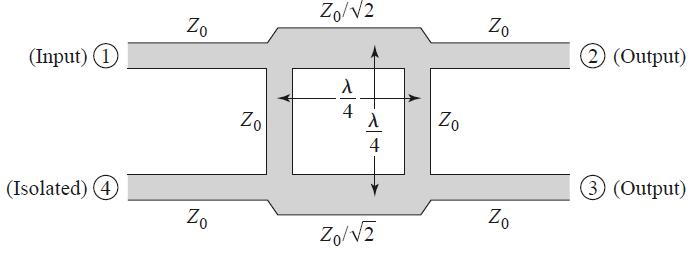

Datos:

* w: longitud del strip
* t: espesor de la línea = 17.5 $\mu$m
* l: longitud del sustrato
* S: separación entre líneas
* $Z_0$=50 $\Omega$
* C=3.8 dB
* f=10 GHz

Sustrato  (Rogers rt-5880)
* h: espesor del sustrato 
* $\epsilon_r$ - dielectric constant = 2.2


* Wavelength=14.46 mm

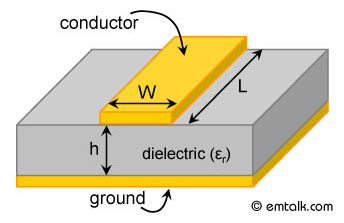

## Information

In [1]:
import numpy as np
import pandas as pd

In [5]:
Z0=50
C=3.8
er=3.66
Z2=Z0/np.sqrt(2)

$\epsilon_r= \frac{\epsilon_r+1}{2}+\frac{\epsilon_r-1}{2}(\frac{1}{\sqrt{1+10 \frac{h}{W}}})$

* $W/h \leq 1$

$Z_0=\frac{60}{\sqrt{\epsilon_r}} ln(\frac{8h}{W}+\frac{W}{4h})$

* $W/h \geq 1$

$Z_0=\frac{120\pi}{\sqrt{\epsilon_r} [\frac{W}{h}+1.393+0.667 ln(\frac{W}{h}+1.444)]}$

https://predictivehacks.com/newton-raphson-method-in-python/

https://chemandy.com/calculators/microstrip-transmission-line-calculator-hartley27.htm

In [35]:
Z0=Z0*np.sqrt(2)

In [23]:
from sympy import *

In [24]:
x = symbols('x')

In [37]:
# define the function
f1 = Z0-(60/((er+1)/2+((er-1)/2)*(1+12*1/x)**(-0.5))**0.5)*log(8/x+x/4)

In [38]:
# find the first derivative
fderivative1 = f1.diff(x)
fderivative1

-39.3073069248251*(1/4 - 8/x**2)*(0.570815450643777*(1 + 12/x)**(-0.5) + 1)**(-0.5)/(x/4 + 8/x) + 67.3116543476619*(1 + 12/x)**(-1.5)*(0.570815450643777*(1 + 12/x)**(-0.5) + 1)**(-1.5)*log(x/4 + 8/x)/x**2

In [39]:
# get a valua of the derivate for a specific x
# let's say f'(0)
fderivative1.evalf(subs= {x:1})

36.7398278758393

In [46]:
xn = 0.01
for i in range(20):
    xn = xn - np.float(f1.evalf(subs= {x:xn})) / np.float(fderivative1.evalf(subs= {x:xn}))
    print(f'The {i+1} iteration xn is {xn:.2} and f(xn) is {np.float(f1.evalf(subs= {x:xn})):.2}')

The 1 iteration xn is 0.015 and f(xn) is -3.5
The 2 iteration xn is 0.016 and f(xn) is -0.14
The 3 iteration xn is 0.016 and f(xn) is -0.00025
The 4 iteration xn is 0.016 and f(xn) is -8e-10
The 5 iteration xn is 0.016 and f(xn) is -3.1e-15
The 6 iteration xn is 0.016 and f(xn) is -3.1e-15
The 7 iteration xn is 0.016 and f(xn) is -3.1e-15
The 8 iteration xn is 0.016 and f(xn) is -3.1e-15
The 9 iteration xn is 0.016 and f(xn) is -3.1e-15
The 10 iteration xn is 0.016 and f(xn) is -3.1e-15
The 11 iteration xn is 0.016 and f(xn) is -3.1e-15
The 12 iteration xn is 0.016 and f(xn) is -3.1e-15
The 13 iteration xn is 0.016 and f(xn) is -3.1e-15
The 14 iteration xn is 0.016 and f(xn) is -3.1e-15
The 15 iteration xn is 0.016 and f(xn) is -3.1e-15
The 16 iteration xn is 0.016 and f(xn) is -3.1e-15
The 17 iteration xn is 0.016 and f(xn) is -3.1e-15
The 18 iteration xn is 0.016 and f(xn) is -3.1e-15
The 19 iteration xn is 0.016 and f(xn) is -3.1e-15
The 20 iteration xn is 0.016 and f(xn) is -3.1e-1

In [17]:
# define the function
f2 = Z0-120*np.pi/( (((er+1)/2+((er-1)/2)*(1+12*1/x)**(-0.5))**0.5)*(x+1.393+0.667*log(x+1.444)) )

In [18]:
# find the first derivative
fderivative2 = f2.diff(x)
fderivative2

-127.277291665413*(-1 - 0.667/(x + 1.444))*(0.570815450643777*(1 + 12/x)**(-0.5) + 1)**(-0.5)/(0.717875089734386*x + 0.478822684852836*log(x + 1.444) + 1)**2 + 422.93159759918*(1 + 12/x)**(-1.5)*(0.570815450643777*(1 + 12/x)**(-0.5) + 1)**(-1.5)/(x**2*(x + 0.667*log(x + 1.444) + 1.393))

In [19]:
# get a valua of the derivate for a specific x
# let's say f'(0)
fderivative2.evalf(subs= {x:1})

35.1156712675249

In [20]:
xn = 0.001
for i in range(10):
    xn = xn - np.float(f2.evalf(subs= {x:xn})) / np.float(fderivative2.evalf(subs= {x:xn}))
    print(f'The {i+1} iteration xn is {xn:.2} and f(xn) is {np.float(f2.evalf(subs= {x:xn})):.2}')

The 1 iteration xn is 0.24 and f(xn) is -4.9e+01
The 2 iteration xn is 0.77 and f(xn) is -1.5e+01
The 3 iteration xn is 1.1 and f(xn) is -2.4
The 4 iteration xn is 1.2 and f(xn) is -0.083
The 5 iteration xn is 1.2 and f(xn) is -0.0001
The 6 iteration xn is 1.2 and f(xn) is -1.7e-10
The 7 iteration xn is 1.2 and f(xn) is -2.5e-15
The 8 iteration xn is 1.2 and f(xn) is -2.5e-15
The 9 iteration xn is 1.2 and f(xn) is -2.5e-15
The 10 iteration xn is 1.2 and f(xn) is -2.5e-15


For my model:

* $\frac{W_{50}}{h} \geq 1 (50 \Omega)$

$$\frac{W_{50}}{h}=3.1$$

* $\frac{W_{35}}{h} \geq 1 (35.35 \Omega)$

$$\frac{W_{35}}{h}=5$$

In [58]:
er=3.66
h=0.508 #in milimeters
W1=1.1684
W2=0.008128
W3=0.047244
t=0.0175
f=10

## Functions
https://www.emtalk.com/mscalc.php?er=2.2&h=0.33&h_units_list=hmm&f=10&Zo=35.3555&EL=90&Operation=Synthesize&Wa=1.6570002998131&W_units_list=Wmm&La=5.4043868774906&L_units_list=Lmm

$\epsilon_r= \frac{\epsilon_r+1}{2}+\frac{\epsilon_r-1}{2}(\frac{1}{\sqrt{1+10 \frac{h}{W}}})$

In [48]:
def fun_eff(W,er,h):
  eff=(er+1)/2+((er-1)/2)*(1+12*h/W)**(-0.5)
  print("eff value is: ",eff)
  return eff

$\lambda_g=\frac{300}{f_{GHz}\sqrt{\epsilon_{ff}}}$

In [49]:
def fun_plegth(eff,f):
  lambdax = 300/(f*np.sqrt(eff))
  lent=lambdax/4
  print("lamnda value is: ",lambdax)
  print("lent value is: ",lent)

  return lent,lambdax

$L=\frac{\lambda_g}{4}$

In [59]:
eff1 =fun_eff(W1,er,h)
L1,lb1=fun_plegth(eff1,f)

eff value is:  2.8633932804304827
lamnda value is:  17.728857692197554
lent value is:  4.4322144230493885


In [60]:
eff2 =fun_eff(W2,er,h)
L2,lb2=fun_plegth(eff2,f)

eff value is:  2.378532389283727
lamnda value is:  19.452110136743457
lent value is:  4.863027534185864


In [61]:
eff3 =fun_eff(W3,er,h)
L3,lb3=fun_plegth(eff3,f)

eff value is:  2.4466342467152
lamnda value is:  19.17947563751969
lent value is:  4.794868909379923


## Final values

In [62]:
mesurament={'frecuency (GHz)':f,'wavelengt 1 (mm)':lb1,'wavelengt 2 (mm)':lb2 ,'sustarte h (mm)':h,
            'dielectric er':er,'impedance Z0 (Ohms)':Z0,
            'w1(mm)':W1,'L1(mm)':L1,'w2(mm)':W2,'L2(mm)':L2,'w3(mm)':W3,'L3(mm)':L3}

In [63]:
pd.DataFrame.from_dict(mesurament, orient='index',columns=['Data'])

,Data
frecuency (GHz),10.000000
wavelengt 1 (mm),17.728858
wavelengt 2 (mm),19.452110
sustarte h (mm),0.508000
dielectric er,3.660000
impedance Z0 (Ohms),241.421356
w1(mm),1.168400
L1(mm),4.432214
w2(mm),0.008128
L2(mm),4.863028


### Bend
https://www.everythingrf.com/rf-calculators/microstrip-mitred-bend-calculator

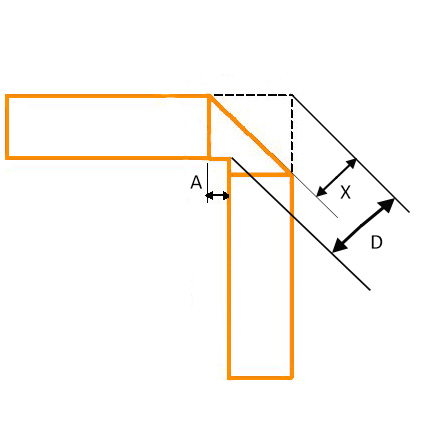

In [ ]:
def fun_bend(W,h):
  D=W*np.sqrt(2)
  X=D*(0.52+0.65*np.exp(-1.35*(W/h)))
  A=X*np.sqrt(2)-W
  print("D value is: ",D)
  print("X value is: ",X)
  print("A value is: ",A)

  return D,X,A

In [ ]:
D50,X50,A50 = fun_bend(W50,h)

D value is:  1.4467404743076762
X value is:  0.7666197245788621
A value is:  0.061164011682153685


In [ ]:
D35,X35,A35 = fun_bend(W35,h)

D value is:  2.3334523779156067
X value is:  1.2151711612091178
A value is:  0.06851153678659738


# Plots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('S Parameter Plot 2.csv',delimiter=',')
df

,h [mm],L0 [mm],L1 [mm],L2 [mm],L3 [mm],L4 [mm],L5 [mm],s1 [mm],s2 [mm],s3 [mm],s4 [mm],W0 [mm],W1 [mm],W2 [mm],W3 [mm],W4 [mm],W5 [mm],Freq [GHz],"dB(S(1,1)) []"
0,0.700,4.095520,4.153110,4.107940,4.107940,4.153110,4.095520,0.384116,0.948502,0.948502,0.384116,1.35506,1.19712,1.313420,1.313420,1.19712,1.35506,5.000,3.584596
1,0.700,4.095520,4.153110,4.107940,4.107940,4.153110,4.095520,0.384116,0.948502,0.948502,0.384116,1.35506,1.19712,1.313420,1.313420,1.19712,1.35506,5.025,3.575743
2,0.700,4.095520,4.153110,4.107940,4.107940,4.153110,4.095520,0.384116,0.948502,0.948502,0.384116,1.35506,1.19712,1.313420,1.313420,1.19712,1.35506,5.050,3.566348
3,0.700,4.095520,4.153110,4.107940,4.107940,4.153110,4.095520,0.384116,0.948502,0.948502,0.384116,1.35506,1.19712,1.313420,1.313420,1.19712,1.35506,5.075,3.556408
4,0.700,4.095520,4.153110,4.107940,4.107940,4.153110,4.095520,0.384116,0.948502,0.948502,0.384116,1.35506,1.19712,1.313420,1.313420,1.19712,1.35506,5.100,3.545918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75383,0.762,5.093758,4.365226,4.080822,4.080822,4.365226,5.093758,0.258921,0.595917,0.595917,0.258921,2.25000,0.96532,1.773533,1.773533,0.96532,2.25000,14.900,-2.913474
75384,0.762,5.093758,4.365226,4.080822,4.080822,4.365226,5.093758,0.258921,0.595917,0.595917,0.258921,2.25000,0.96532,1.773533,1.773533,0.96532,2.25000,14.925,-2.955175
75385,0.762,5.093758,4.365226,4.080822,4.080822,4.365226,5.093758,0.258921,0.595917,0.595917,0.258921,2.25000,0.96532,1.773533,1.773533,0.96532,2.25000,14.950,-2.997120
75386,0.762,5.093758,4.365226,4.080822,4.080822,4.365226,5.093758,0.258921,0.595917,0.595917,0.258921,2.25000,0.96532,1.773533,1.773533,0.96532,2.25000,14.975,-3.039298


In [ ]:
df.columns

Index(['h [mm]', 'L0 [mm]', 'L1 [mm]', 'L2 [mm]', 'L3 [mm]', 'L4 [mm]',
       'L5 [mm]', 's1 [mm]', 's2 [mm]', 's3 [mm]', 's4 [mm]', 'W0 [mm]',
       'W1 [mm]', 'W2 [mm]', 'W3 [mm]', 'W4 [mm]', 'W5 [mm]', 'Freq [GHz]',
       'dB(S(1,1)) []'],
      dtype='object')

In [ ]:
df.plot()

Index(['Freq [GHz]', 'dB(S(1,1)) []', 'dB(S(2,1)) []', 'dB(S(3,1)) []',
       'dB(S(4,1)) []'],
      dtype='object')

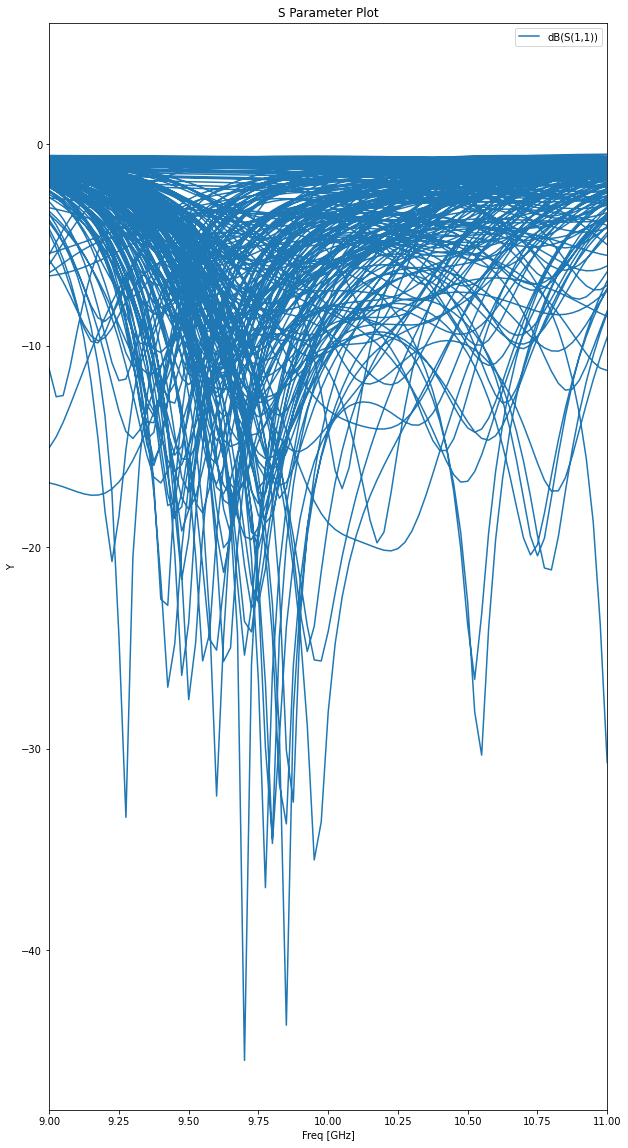

In [ ]:
plt.figure(figsize=(10,20))
plt.plot(df['Freq [GHz]'],df['dB(S(1,1)) []'],label='dB(S(1,1))')
#plt.plot(df['Freq [GHz]'],df['dB(S(2,1)) []'],label='dB(S(2,1))')
#plt.plot(df['Freq [GHz]'],df['dB(S(3,1)) []'],label='dB(S(3,1))')
#plt.plot(df['Freq [GHz]'],df['dB(S(4,1)) []'],label='dB(S(4,1))')

#plt.yscale('log',base=10)
plt.xlim([9,11])
plt.title('S Parameter Plot')
plt.xlabel('Freq [GHz]')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
df1 = pd.read_csv('S Parameter Plot 1x.csv',delimiter=',')
df1

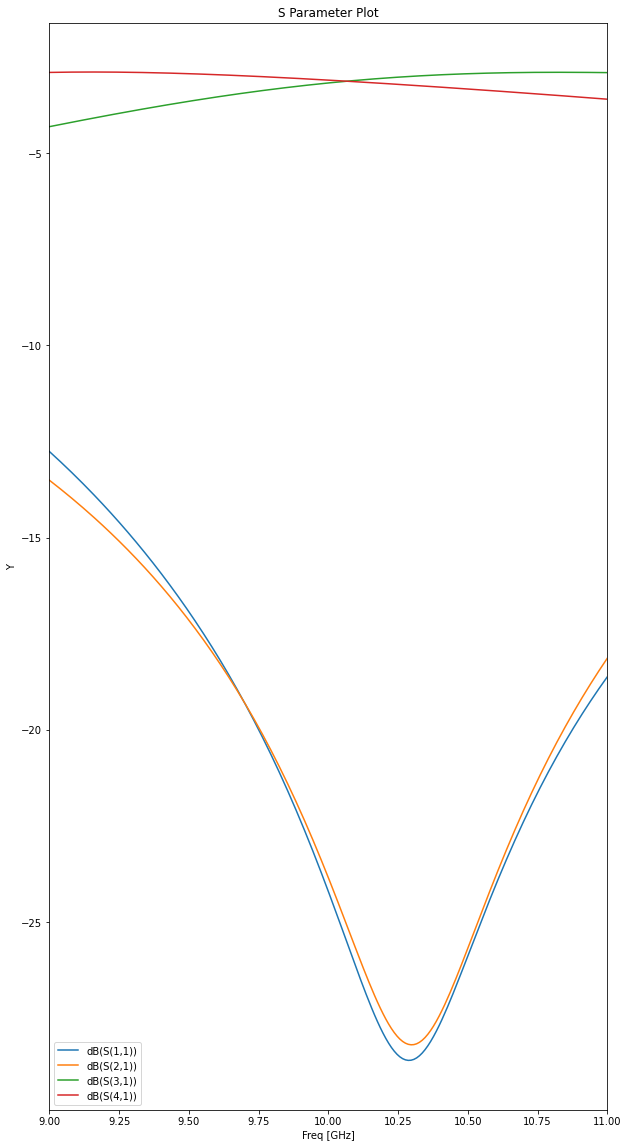

In [ ]:
plt.figure(figsize=(10,20))
plt.plot(df1['Freq [GHz]'],df1['dB(S(1,1)) []'],label='dB(S(1,1))')
plt.plot(df1['Freq [GHz]'],df1['dB(S(2,1)) []'],label='dB(S(2,1))')
plt.plot(df1['Freq [GHz]'],df1['dB(S(3,1)) []'],label='dB(S(3,1))')
plt.plot(df1['Freq [GHz]'],df1['dB(S(4,1)) []'],label='dB(S(4,1))')

#plt.yscale('log',base=10)
plt.xlim([9,11])
plt.title('S Parameter Plot')
plt.xlabel('Freq [GHz]')
plt.ylabel('Y')
plt.legend()
plt.show()